# Regresja logistyczna
## 3-projekt-ml

## Import danych

In [1]:
# Import bibliotek (pandas – tabelki)
import pandas as pd

In [2]:
# Import danych – label encoded
df_le = pd.read_csv('../../data_preparation/label_encoded_df.zip')

# Import danych – one hot encoded
df_ohe = pd.read_csv('../../data_preparation/dummiefied_df.zip')

In [3]:
# Podgląd próbki dla `df_le`
df_le.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5985,1,5,3,4,0,2,1,0,1,0,...,2,1,6,7,2,1,0,7,4,2
2062,0,2,0,3,0,5,1,1,0,7,...,0,2,7,7,2,1,0,3,3,1
5294,1,2,3,9,0,2,1,0,0,2,...,1,1,0,0,2,1,2,1,5,0
4497,0,2,2,4,1,5,1,0,0,1,...,2,2,7,7,2,2,0,7,1,6
2388,1,5,2,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,3,4,1
7584,0,0,0,8,0,5,1,1,0,2,...,1,2,7,7,2,2,4,7,3,1
4823,1,5,0,9,0,2,1,0,0,3,...,1,1,4,6,2,1,2,1,5,1
945,0,2,0,4,0,5,1,1,0,3,...,0,0,7,7,2,1,0,3,0,1
3447,1,5,0,3,0,2,1,0,0,2,...,1,1,0,0,2,1,2,1,5,0
4352,1,2,0,3,0,2,1,0,0,2,...,1,1,4,4,2,1,2,1,4,4


In [4]:
# Podgląd próbki dla `df_ohe`
df_ohe.sample(10)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7112,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6264,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5939,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7822,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6978,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2206,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3523,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
5822,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
884,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
772,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Wizualizacja podstawowych danych

In [5]:
# Import biblioteki do wizualizacji
import seaborn as sns

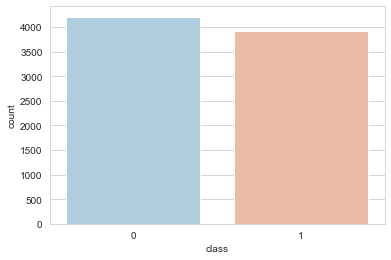

In [6]:
# Podgląd rozkładu kolumny `class` (jadalny czy trujący)
sns.set_style('whitegrid')
sns.countplot(x='class', data=df_le, palette='RdBu_r')

#### Otrzymuję zbalansowany zbiór, jest to dobry znak – praca może być łatwiejsza.

### Model regresji logistycznej

In [7]:
# Import biblioteki do automatycznego podziału danych na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

In [101]:
# Podział na zbiór trenigowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    df_ohe.drop(['class_e', 'class_p'], axis=1),
    df_ohe['class_p'],
    test_size=0.25,
    random_state=1337
)

In [102]:
# Import biblioteki do modelu regresji logistycznej
from sklearn.linear_model import LogisticRegression

In [103]:
# Trening modelu (liblinear nie ma znaczenia dla wyniku, a dla domyślnego zaobserwowałem pewne bugi)
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [104]:
# Predykcja
predictions = logmodel.predict(X_test)

In [105]:
# Import biblioteki do ewaluacji modelu
from sklearn import metrics

In [106]:
# Ewaluacja modelu
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [14]:
from sklearn import metrics

# Metryka confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[1041,    0],
       [   0,  990]])

In [15]:
# Metryki
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


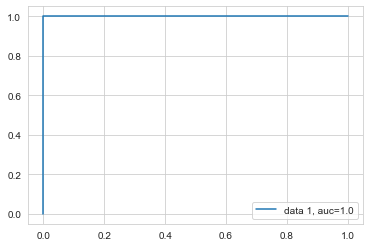

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Metryka krzywej ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Predykcja w aplikacji klienckiej

In [17]:
def predict_for_user_input (mushroom_data):
    local_df = pd.DataFrame(columns=X_test.columns)
    local_df = local_df.append(mushroom_data, ignore_index=True)
    
    # Fill N/a
    local_df.fillna(1, inplace=True)
    
    return logmodel.predict(local_df)

In [18]:
predict_for_user_input({ 'cap-shape_k': 0 })

array([1])

#### Dla niewystarczających danych aplikacja wykazuje skłonność do dawania false - positivów. To dobrze!
##### W tym przypadku lepsze są false positive niż false negative :)

#### Testy funkcji

In [19]:
import numpy as np

# Weźmy sobie 10 rekordów
test_sample = X_test.iloc[:10]

In [20]:
test_sample_y_prod = predict_for_user_input(test_sample)
test_sample_y_prod

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [21]:
# Pierwszy rekord ma wynik true, weźmy sobie ten row i odwróćmy wartości, żeby sprawdzić efekt
predict_for_user_input(test_sample.apply(lambda x: np.invert(x)))

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

### Ok, testy wypadają książkowo – czy jest za dobrze?

### Dodatkowe metryki - feature importance

In [22]:
# Wyciągnięcie feature importance
importance = logmodel.coef_[0]

# Podsumowanie feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.28441
Feature: 1, Score: 0.55184
Feature: 2, Score: -0.08330
Feature: 3, Score: 0.02020
Feature: 4, Score: -0.58900
Feature: 5, Score: -0.18420
Feature: 6, Score: -0.81355
Feature: 7, Score: 0.75658
Feature: 8, Score: 0.16402
Feature: 9, Score: -0.10710
Feature: 10, Score: 0.87401
Feature: 11, Score: -0.87947
Feature: 12, Score: 0.03128
Feature: 13, Score: -0.01994
Feature: 14, Score: -0.41838
Feature: 15, Score: 0.77159
Feature: 16, Score: -0.26337
Feature: 17, Score: -0.40843
Feature: 18, Score: 0.52358
Feature: 19, Score: -0.21092
Feature: 20, Score: -0.06852
Feature: 21, Score: 0.06847
Feature: 22, Score: -2.73062
Feature: 23, Score: 2.67658
Feature: 24, Score: 2.66977
Feature: 25, Score: -2.78605
Feature: 26, Score: 0.32551
Feature: 27, Score: -4.00645
Feature: 28, Score: 2.15779
Feature: 29, Score: 0.85742
Feature: 30, Score: 0.83599
Feature: 31, Score: -0.12261
Feature: 32, Score: 0.12255
Feature: 33, Score: 1.48023
Feature: 34, Score: -1.48028
Feature: 35, 

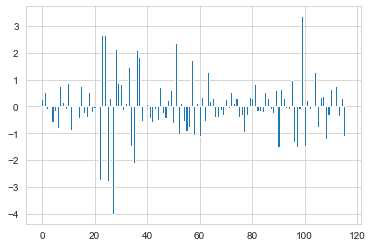

In [23]:
# Plotowanie feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

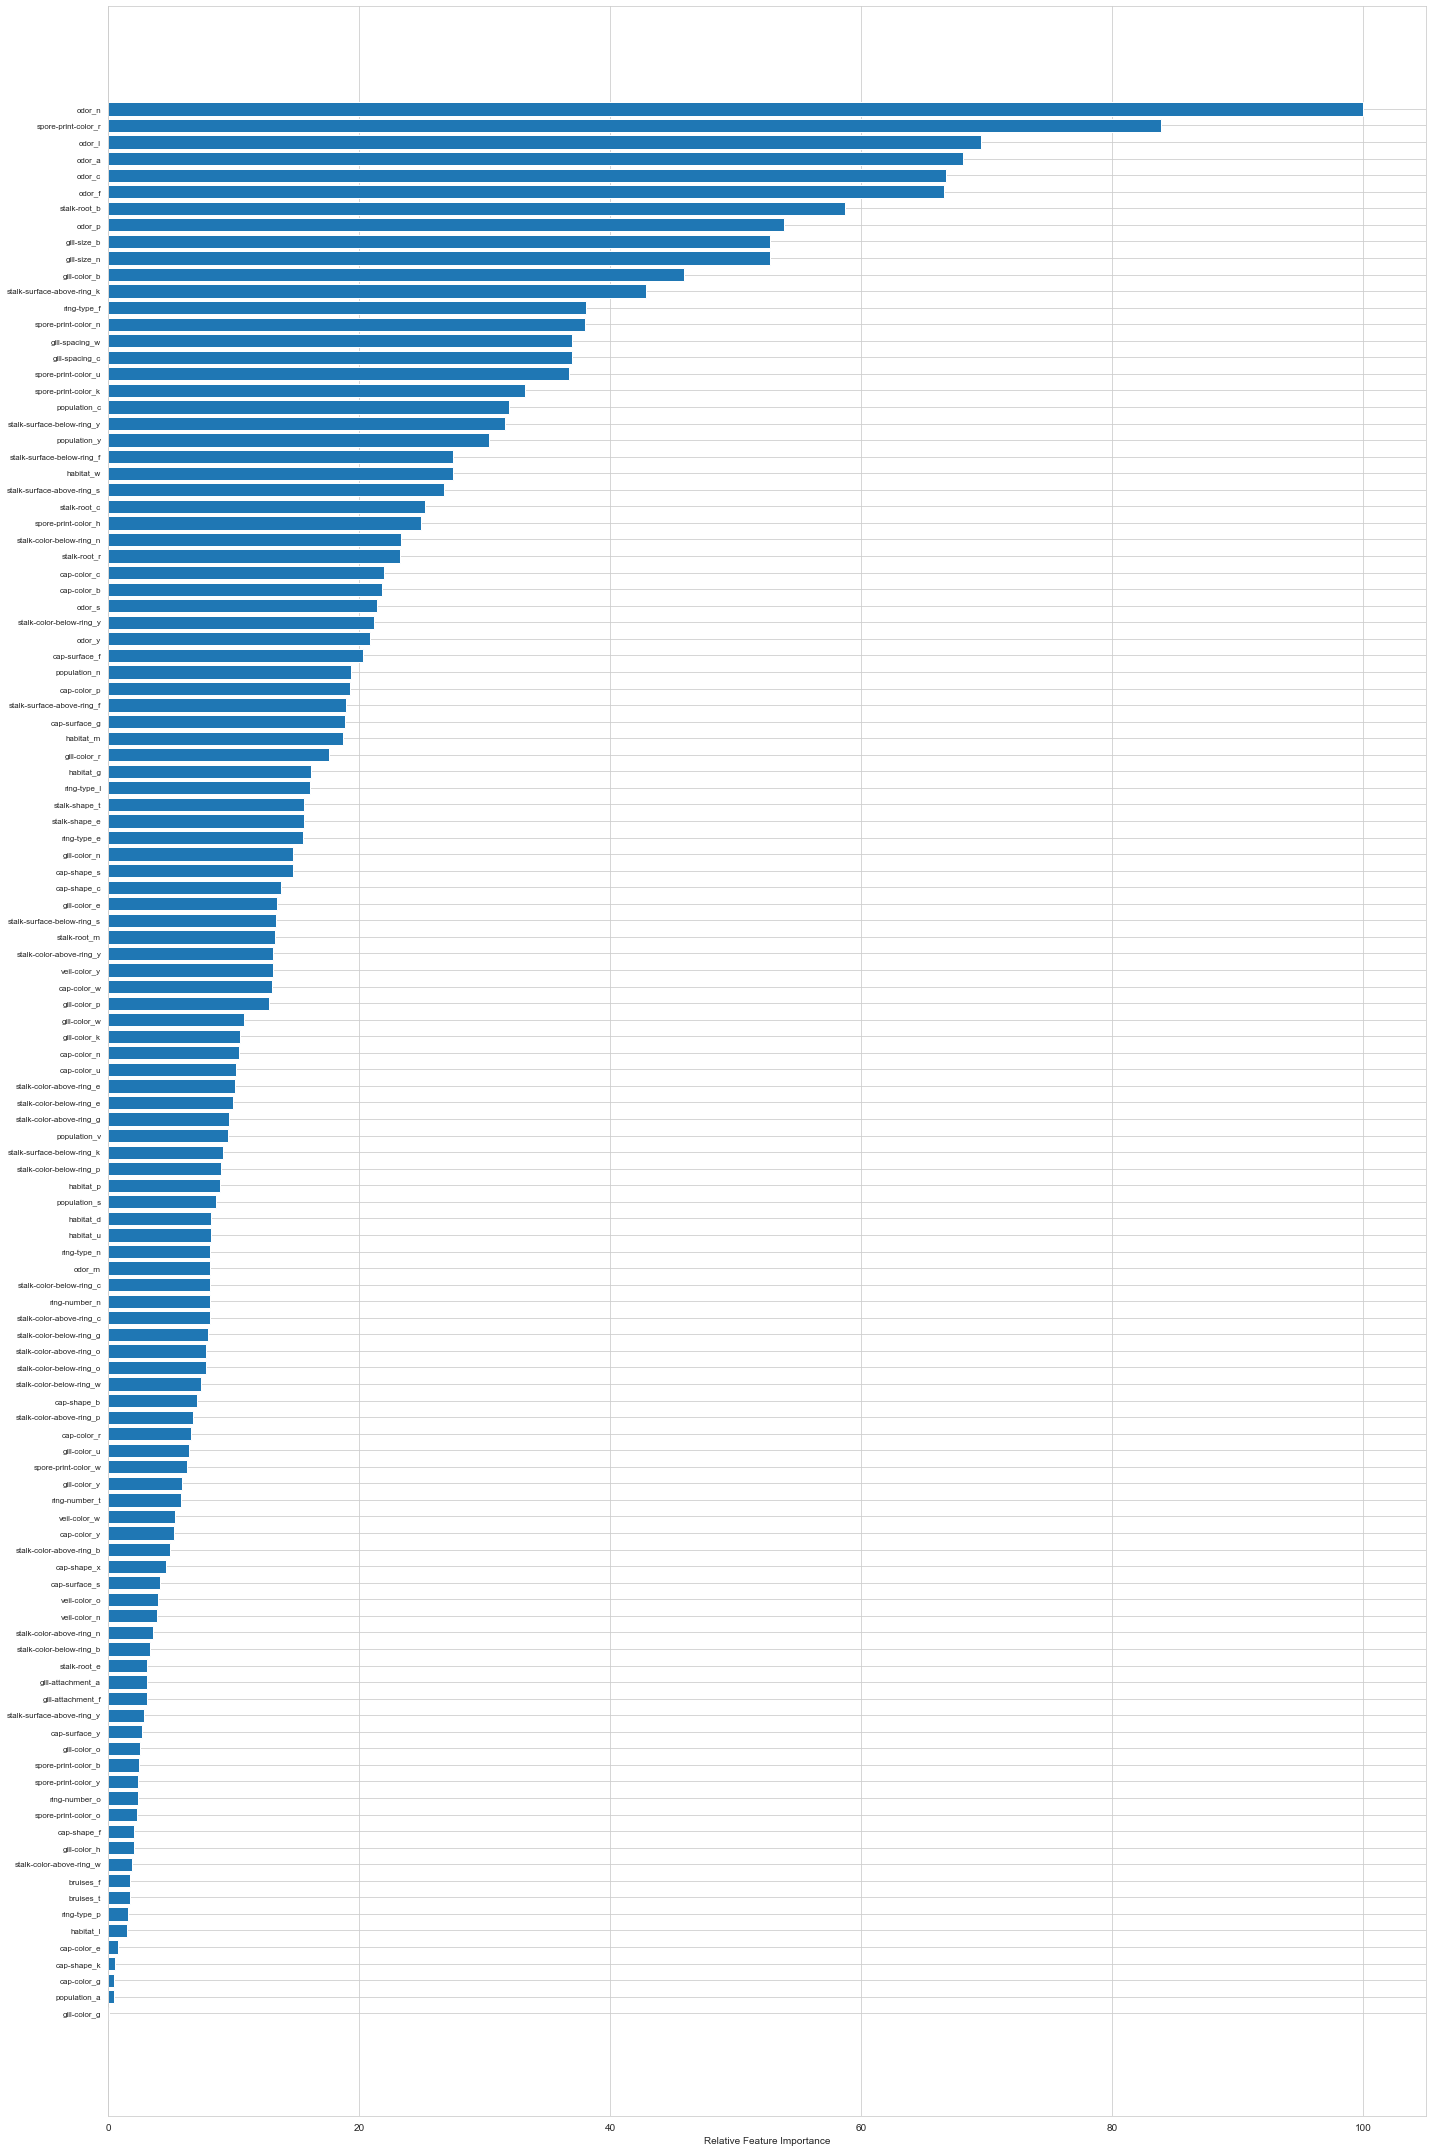

In [24]:
# Plotowanie feature importance z labelami, posortowane
feature_importance = abs(logmodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20, 30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [25]:
# Dlaczego `odor_n` ma największe znaczenie?
np.unique(predict_for_user_input(X_test[X_test['odor_n'] == 1]), return_counts=True)

(array([0, 1]), array([837,  28]))

In [109]:
# Grzyby bez zapachu najczęściej nie są trujące :)

# Dalsze testy
np.unique(predict_for_user_input(X_test[X_test['odor_m'] == 1]), return_counts=True)

(array([1]), array([13]))

In [27]:
np.unique(df_ohe[df_ohe['odor_n'] == 1]['class_p'], return_counts=True)

(array([0, 1]), array([3408,  120]))

### Sprawdzenie, czy ten sam kod da ~50% accuracy przy losowym Y

In [108]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df_ohe.drop(['class_e', 'class_p'], axis=1),
    pd.Series(np.random.choice(a=[0, 1], size=8124), index=df_ohe['class_p'].index, name='class_p'),
    test_size=0.25,
    random_state=1337
)

logmodel_2 = LogisticRegression(solver='liblinear')
logmodel_2.fit(X_train_2, y_train_2)

print(metrics.classification_report(y_test_2, logmodel_2.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1013
           1       0.51      0.47      0.49      1018

    accuracy                           0.51      2031
   macro avg       0.51      0.51      0.51      2031
weighted avg       0.51      0.51      0.51      2031



# Podsumowanie

### Skuteczność predykcji przy podaniu wszystkich danych grzyba równa 100%.
### Zaimplementowano funkcję zdolną przyjąć do predykcji ograniczoną liczbę argumentów (domyślne wypełnienie brakujących zerem z tendencją do false-positive (to dobrze))